## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df= pd.read_csv("ab_data.csv")
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
Num_rows= len(df)
print("Number of rows is: ", Num_rows)

Number of rows is:  294478


c. The number of unique users in the dataset.

In [6]:
#Number of unique users is the same as the number of uniqe user_id.
df.user_id.nunique()

290584

d. The proportion of users converted.

In [7]:
converted= (df.converted).value_counts()[1]
print("The proportion of users converted: ", converted/290584)
#print(converted)
df.shape

The proportion of users converted:  0.121262698566


(294478, 5)

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df_treatment= df[df.group=="treatment"]
df_newpage= df[df.landing_page=="new_page"]

df_count_1= df_treatment[df_treatment.landing_page!="new_page"]
df_count_2= df_newpage[df_newpage.group!="treatment"]
dummy= df_count_1.append(df_count_2)
count_1= df_count_1.nunique()[0]
count_2= df_count_2.nunique()[0]
print("Number of times new_page and treatment not match:", count_2+count_1)

Number of times new_page and treatment not match: 3893


f. Do any of the rows have missing values?

In [7]:
(df.isnull()).any() #No missing data, since all the answers are false.

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df_treatment= df[df.group=="treatment"]
df_control= df[df.group=="control"]
#dummy= df[df.landing_page=="new_page"]
d1= df_treatment[df_treatment["landing_page"]== "new_page"]
d2= df_control[df_control["landing_page"]== "old_page"]
df2= d1.append(d2)
print("df2 shape is: ", df2.shape)
df2.head()


df2 shape is:  (290585, 5)


,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
unique_users= df2.nunique()[0] #Number of uniqure User_ids is 290584
print("Number of unique user_id are: ", unique_users)

Number of unique user_id are:  290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
repeated_user= df2[df2.user_id.duplicated()]
print("Repeated User ID is: ", repeated_user.user_id.unique()) #user_id 773192

Repeated User ID is:  [773192]


c. What is the row information for the repeat **user_id**? 

In [12]:
repeated_user

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2= df2.drop(index= 2893)

In [14]:
#checking to make sure that the duplicate has been removed
print(df2.shape) #number of rows is a less by one
df2.query('user_id== 773192') #querying returns a single row since the second was dropped

(290584, 5)


,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [16]:
prob_convert= df2.converted.mean()
print("Probability individual convert regardless of pagethey receive", prob_convert)

Probability individual convert regardless of pagethey receive 0.119597087245


b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df_control= df2[df2.group== "control"]
print("Probability for control group to convert", df_control.converted.mean())

Probability for control group to convert 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df_treatment= df2[df2.group== "treatment"]
print("Probability for control treatment to convert", df_treatment.converted.mean())

Probability for control treatment to convert 0.118808065515


d. What is the probability that an individual received the new page?

In [19]:
new_page_ppl= df2.landing_page.value_counts()[0]
all_ppl= df2.shape[0]
print("Probability an individual received new page: ",new_page_ppl/all_ppl)

Probability an individual received new page:  0.500061944223


e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

#### my answer:

Given that the probability of converting regardless of the page (0.1196) is very close to both individuals in control who converted (0.1204) and  individuals in treatment who also converted (0.1188). When taken into consideration that the distribution of the new page test vs the old page was distributed almost 1:1 among the users, I think we can safely say that there is no sufficient evidence to conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Given the assumption in the question, our hypotheses will be:

H_0 (Null hypothesis): p_old >= p_new

H_1 (Alternative): p_new > p_old

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
conv_rate_dfNew= df2[df2["converted"]==1]
p_new= conv_rate_dfNew.shape[0]/df2.shape[0]
print("conversion rate for  𝑝_𝑛𝑒𝑤  under the null: ", p_new)

conversion rate for  𝑝_𝑛𝑒𝑤  under the null:  0.11959708724499628


b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old= df2[df2["converted"]==1].shape[0]/df2.shape[0]
print("conversion rate for  𝑝_𝑛𝑒𝑤  under the null: ", p_old)

conversion rate for  𝑝_𝑛𝑒𝑤  under the null:  0.11959708724499628


c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
new= df2[df2["group"]=="treatment"]
n_new= new.user_id.nunique()
print("the number of individuals in the treatment group: ", n_new)

the number of individuals in the treatment group:  145310


d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
old= df2[df2["group"]=="control"]
n_old= old.user_id.nunique()
print(" the number of individuals in the control group", n_old)

 the number of individuals in the control group 145274


e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted= np.random.binomial(1, p_new, n_new)
print(new_page_converted)

[0 0 0 ..., 0 0 0]


f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted= np.random.binomial(1, p_old, n_old)
print(old_page_converted)

[0 0 0 ..., 0 0 0]


g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
old_mean= old_page_converted.mean()
new_mean= new_page_converted.mean()
new_mean- old_mean

0.00053450258835520403

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
p_diffs= []
for i in range(10000):
    new_mean= np.random.binomial(1, p_new, n_new).mean()
    old_mean= np.random.binomial(1, p_old, n_old).mean()
    p_diffs.append(new_mean-old_mean)
p_diffs= np.array(p_diffs)
p_diffs
    

array([-0.00177086, -0.00018093,  0.00016326, ..., -0.00177101,
        0.00126394, -0.00149573])

In [28]:
p_diffs

array([-0.00177086, -0.00018093,  0.00016326, ..., -0.00177101,
        0.00126394, -0.00149573])

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

In [29]:
df_treat= df2[df2["group"]== "treatment"]
mean_treat_conv= df_treat.converted.mean()
df_con= df2[df2["group"]== "control"]
mean_con_conv= df_con.converted.mean()
diff_0= mean_treat_conv-mean_con_conv
diff_0

-0.0015782389853555567

In [30]:
lower, upper= np.percentile(p_diffs, 0.5), np.percentile(p_diffs, 99.5)
lower, upper

(-0.0030578609777736458, 0.0031501696494020694)

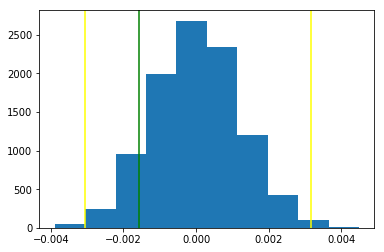

In [31]:
plt.hist(p_diffs);
plt.axvline(diff_0, color= 'green')
plt.axvline(lower, color= 'yellow')
plt.axvline(upper, color= 'yellow')


Yes, since the produced curve is a normal distribution.

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [32]:
(p_diffs> diff_0).mean()

0.90680000000000005

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

#### Answer


In part j we calculated the  probability of committing a Type I error. This happens when the null hypothesis is true, and yet we decide wrongly that the alternative is the correct.

In scientific studies,it's called the p-value.


Since the p-value is relatively large (in this case it's around 0.9), we do not have statistically significent evidence that tells us the new page provides a better conversion, this is why we fail to reject the null hypothesis

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [33]:
import statsmodels.api as sm

convert_old = df2.query('landing_page== "old_page"')
convert_old= convert_old.query('converted==1').shape[0]
convert_new = df2.query('landing_page== "new_page"')
convert_new= convert_new.query('converted==1').shape[0]
n_old = df2[df2.landing_page=="old_page"].shape[0]
n_new = df2[df2.landing_page=="new_page"].shape[0]

print("conver_old: ", convert_old)
print("convert_new: ", convert_new)
print("n_old: ", n_old)
print("n_new: ", n_new)
                        

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


conver_old:  17489
convert_new:  17264
n_old:  145274
n_new:  145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [34]:
p_diffs.mean(), p_diffs.std(), p_diffs.var()

(1.3175650301675095e-05, 0.0012044552930182513, 1.4507125528796813e-06)

In [35]:
z, p_value= sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],   alternative='smaller')

In [36]:
print("Z_score is: ", z, "\np_value is", p_value)

Z_score is:  1.31092419842 
p_value is 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

I think Logistic Regression best suited in this case since we want to predict 1 out of two possible outcomes.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
df2["intercept"]= 1
df2["ab_page"]= df2["landing_page"].apply(lambda x: 1 if x== "new_page" else 0)
df2 = df2.join(pd.get_dummies(df2["landing_page"]))
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
log_model= sm.Logit(df2.converted, df2[["intercept", "ab_page"]])
model_fitting= log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [39]:
model_fitting.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-15 22:51 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

In regression, the p-value is given for testing if a variable has impact on response and how much impact it has.

H_0: Variable impact= 0
H_1: Variable impact != 0


When p-value < 0.05, it suggests a variable is statistically significant in relating to the response variable. and for a bigger p-value, there is no significant relationship between them.

p-value for old page (x)= 0.0 which statistically significant in relating to the response variable p-value for new (ab) page (x) around 0.19 isn't statistically significant in relating to the response.


The reason p-value differs here from Part II is because in the A/B test our null hypothesis is a one-tailed test. Unlike regression which is a two-tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

There are other things that could potneitally influence wjether or not individals convert such as page viewing duration etc.

Adding more factors could improve our model predicition accuary but keep in mind that the main disadvantage of adding more relevant factors occurs when the added factors are dependant which distorts the prediction.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
df_country=pd.read_csv('countries.csv')
df_country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
df2=df2.join(df_country.set_index('user_id'),on='user_id')
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1,0,CA
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,1,0,UK
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1,0,CA


In [42]:
df2.country.unique()

array(['US', 'CA', 'UK'], dtype=object)

In [43]:
df2=df2.join(pd.get_dummies(df2['country']))

In [44]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US,0,0,1
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1,0,CA,1,0,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,1,0,UK,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1,0,CA,1,0,0


In [45]:
log_model2=sm.Logit(df2['converted'], df2[['intercept','US','UK']])
model_fitting2=log_model2.fit()


Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


In [46]:
model_fitting2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-15 22:51 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
==================================================================

"""

In [47]:
np.exp(0.0408),np.exp(0.0507)

(1.0416437559600236, 1.0520072437650141)

There is no significant impact country wise for those from UK or US on the conversion.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [48]:
df2["US_newpage"]= df2["US"]* df2["new_page"]
df2["UK_newpage"]= df2["UK"]* df2["new_page"]
df2["CA_newpage"]= df2["CA"]* df2["new_page"]

In [49]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,new_page,old_page,country,CA,UK,US,US_newpage,UK_newpage,CA_newpage
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,1,0,US,0,0,1,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,1,0,US,0,0,1,1,0,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,1,0,CA,1,0,0,0,0,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,1,0,UK,0,1,0,0,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,1,0,CA,1,0,0,0,0,1


In [50]:
log_model2=sm.Logit(df2['converted'],df2[['intercept','UK_newpage','US_newpage']])
modelfitting3=log_model2.fit()


Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


In [51]:
modelfitting3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-10-15 22:51 AIC:              212781.7674
No. Observations:   290584           BIC:              212813.5064
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9926    0.0079  -252.9104  0.0000  -2.0081  -1.9772
UK_newpage    0.0112    0.0179     0.6256  0.5316  -0.0240   0.0464
US_newpage   -0.0144    0.0125    -1.1548  0.2482  -0.0389   0.0101
==================================================================

"""

In [52]:
1/np.exp(-0.0112),1/np.exp(0.0144)

(1.0112629548117711, 0.98570318412244307)

From the previous number when we try to compare these numbers with conversion rate of those of CA for the treatment group who received the new landing page, we find:

conversion for those in UK is 0.985 times those in CA.

While conversion for those in US is 1.0112629548117711 times those in CA

When we take those numbers into consideration we see that there is small effect that we can measure using statistical analysis but from a paractical approach time developing such a new page and maining it, etc. It add littte to no effect which makes it not a good option for the company.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0